In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
dataset = pd.read_csv('spg.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
temperature_2_m_above_gnd            4213 non-null float64
relative_humidity_2_m_above_gnd      4213 non-null int64
mean_sea_level_pressure_MSL          4213 non-null float64
total_precipitation_sfc              4213 non-null float64
snowfall_amount_sfc                  4213 non-null float64
total_cloud_cover_sfc                4213 non-null float64
high_cloud_cover_high_cld_lay        4213 non-null int64
medium_cloud_cover_mid_cld_lay       4213 non-null int64
low_cloud_cover_low_cld_lay          4213 non-null int64
shortwave_radiation_backwards_sfc    4213 non-null float64
wind_speed_10_m_above_gnd            4213 non-null float64
wind_direction_10_m_above_gnd        4213 non-null float64
wind_speed_80_m_above_gnd            4213 non-null float64
wind_direction_80_m_above_gnd        4213 non-null float64
wind_speed_900_mb                    4213 non-null float64
wind_direction_9

In [4]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [5]:
X

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,21.66,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,11.97,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,9.01,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,7.34,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027


# PSO - SVR

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D

<AxesSubplot:>

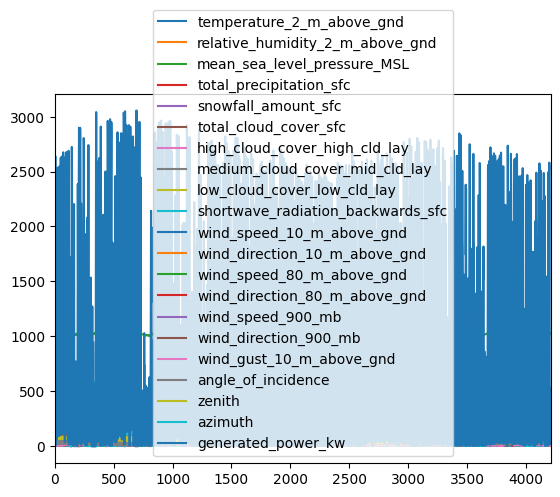

In [7]:
dataset.plot()

In [8]:
len(dataset)

4213

In [9]:
data_n = dataset.copy()
data_n = (dataset - dataset.min())/(dataset.max() - dataset.min())
print(data_n)

      temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                      0.186832                         0.258065   
1                      0.190311                         0.215054   
2                      0.223602                         0.279570   
3                      0.277516                         0.247312   
4                      0.324969                         0.215054   
...                         ...                              ...   
4208                   0.348820                         0.634409   
4209                   0.320994                         0.892473   
4210                   0.313540                         0.892473   
4211                   0.337888                         0.795699   
4212                   0.331677                         0.784946   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                        0.760649                  0.00000   
1                        0.762677                  0.00000 

In [10]:
dimensions = 20
data_cn = pd.concat([data_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                      0.186832                         0.258065   
1                      0.190311                         0.215054   
2                      0.223602                         0.279570   
3                      0.277516                         0.247312   
4                      0.324969                         0.215054   
...                         ...                              ...   
4208                   0.348820                         0.634409   
4209                   0.320994                         0.892473   
4210                   0.313540                         0.892473   
4211                   0.337888                         0.795699   
4212                   0.331677                         0.784946   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                        0.760649                  0.00000   
1                        0.762677                  0.00000 

In [11]:
from sklearn.model_selection import train_test_split

X = data_cn.iloc[20:,1:]

y = data_cn.iloc[20:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))

839
839
2515


In [12]:
def pso(n_particles, iterations, dimensions, inertia):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    
    # Initializing particles' positions randomly, inside
    # the search space
    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

    c = np.concatenate((x,y,z), axis=1)

    # Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2
    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize  
    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    # Initializing regression variables
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    

    # Displaying tridimensional search space
    plot(c)

    from sklearn.metrics import mean_squared_error
    
    for i in range(iterations):

        for j in range(n_particles):
          # Starting Regression
          rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

          # Fitting the curve
          rgs.fit(X_train, y_train)
          y_predict = rgs.predict(X_val)

          # Using Mean Squared Error to verify prediction accuracy
          mse = mean_squared_error(y_val, y_predict) 

          # If mse value for that search point, for that particle,
          # is less than its personal best point,
          # replace personal best
          if(mse < p_best_val[j]):   # mse < p_best_val[j]
              # The value below represents the current least Mean Squared Error
              p_best_val[j] = mse
              
              p_best_RGS[j] = rgs
                           

              # The value below represents the current search coordinates for
              # the particle's current least Mean Squared Error found
              p_best[j] = c[j].copy()
              
          # Using auxiliar variable to get the index of the
          # particle that found the configuration with the 
          # minimum MSE value
          aux = np.argmin(p_best_val)        
        
          if(p_best_val[aux] < g_best_val):
              # Assigning Particle's current best MSE to the Group's best    
              g_best_val = p_best_val[aux]

              # Assigning Particle's current best configuration to the Group's best
              g_best = p_best[aux].copy()

              # Group best regressor:
              # the combination of C, Epsilon and Gamma
              # that computes the best fitting curve
              g_best_RGS = p_best_RGS[aux]

        
          rand1 = np.random.random()
          rand2 = np.random.random()

          # The variable below influences directly the particle's velocity.
          # It can either make it smaller or bigger. 
          w = inertia

          # The equation below represents Particle's velocity, which is
          # the rate of change in its position
          v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

          # Change in the Particle's position 
          c[j] = c[j] + v[j]

          # Below is a series of conditions that stop the particles from
          # leaving the search space
          if(c[j][2] < min_g):
            c[j][2] = min_g
          if(c[j][2] > max_g):
            c[j][2] = max_g
          if(c[j][1] < min_e):
            c[j][1] = min_e
          if(c[j][1] > max_e):
            c[j][1] = max_e
          if(c[j][0] < min_c):
            c[j][0] = min_c
          if(c[j][0] > max_c):
            c[j][0] = max_c
            
     
        # The variable below represents the least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
                
        print('Best value iteration # %d = %f\n'%(i, g_best_val))

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best)
    print('\n')
    print('Best Regressor:\n')
    print(g_best_RGS)
    print('\n')
    # Displaying the MSE value variation throughout the iterations
    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend()
    plt.show()

    # Displaying Particles' final configuration
    plot(c)

    # Making the prediction with the best configuration of C, Epsilon and
    # Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    
    # Displaying actual values and predicted values for
    # Group's best configuration found overall
    print(color.BOLD + 'Predictions with the Population Best Value found:\n' + color.END)
    evaluate(predict_test) 

In [13]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [14]:
# Function that displays tridimensional plot
def plot(some_list):
 
  ax = Axes3D(plt.figure())
  ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
  ax.set_xlabel('$C$', fontsize = 20)
  ax.set_ylabel('$\epsilon$', fontsize = 25)
  ax.zaxis.set_rotate_label(False) 
  ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
  ax.zaxis._axinfo['label']['space_factor'] = 1.0
  plt.show()

  print('\n')
  print('\n')

In [15]:
def evaluate(predictions):

    from sklearn.metrics import mean_squared_error
    import statistics as st

    predict_test = predictions

    # To un-normalize the data:
    # Multiply the values by
    # data.to_numpy().max()

    plt.plot(range(len(y_test)), y_test, label='Real')
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)
    print('\n')
    print('\n')
    print('Mean Squared Error for the Test Set:\t %f' %mse)
    print('\n')
    print('\n')
    print('Predictions Average:\t %f' %((predict_test.sum()/len(predict_test))))
    print('\n')
    print('\n')
    print('Predictions Median:\t %f' %(st.median(predict_test)))
    print('\n')
    print('\n')

C:\Users\kcnai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


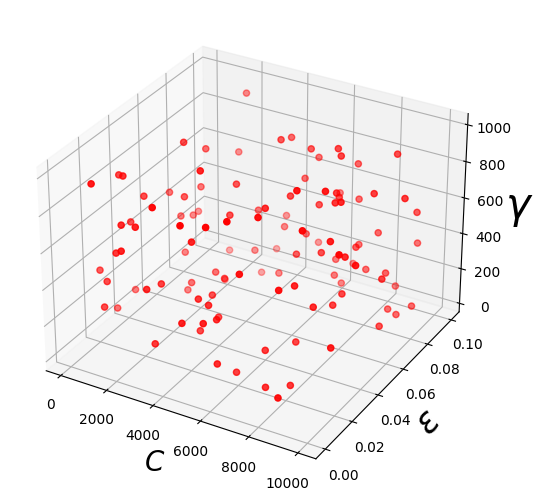





Best value iteration # 0 = 0.044054

Best value iteration # 1 = 0.003988

Best value iteration # 2 = 0.003988

Best value iteration # 3 = 0.003988

Best value iteration # 4 = 0.003988

Best value iteration # 5 = 0.003988

Best value iteration # 6 = 0.003988

Best value iteration # 7 = 0.003988

Best value iteration # 8 = 0.003988

Best value iteration # 9 = 0.003988

Group Best configuration found: 
[1.e+04 1.e-01 1.e-03]


Best Regressor:

SVR(C=10000.0, gamma=0.001)




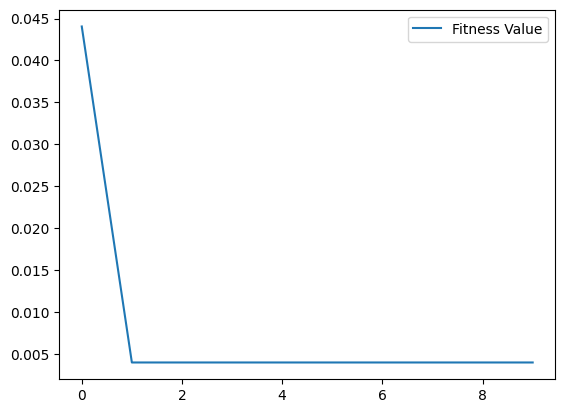

C:\Users\kcnai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


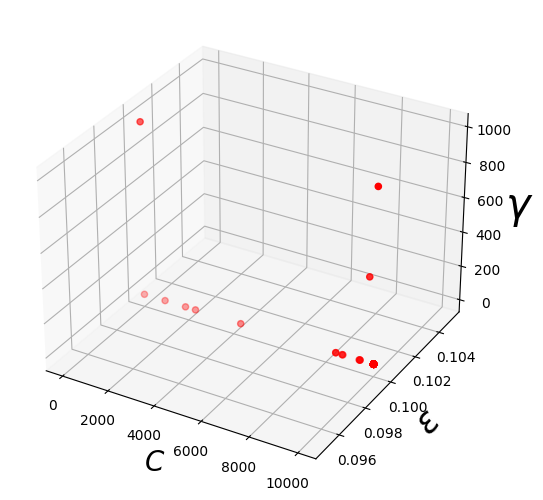





Predictions with the Population Best Value found:



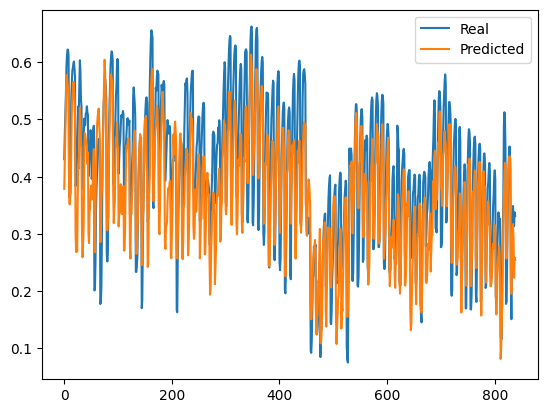





Mean Squared Error for the Test Set:	 0.005284




Predictions Average:	 0.365167




Predictions Median:	 0.365136






In [16]:
pso(120, 10, 3, 1)

# GA-SVC

In [22]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [23]:
X

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,21.66,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,11.97,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,9.01,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,7.34,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
						X, y,
				test_size = 0.30, random_state = 101)


In [28]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


NameError: name 'SVC' is not defined

In [29]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


NameError: name 'grid' is not defined

# SVR

In [30]:
from sklearn.svm import SVR
regr = SVR(C=1.0, epsilon=0.2)

In [31]:
regr.fit(X, y)

SVR(epsilon=0.2)

In [32]:
from sklearn.metrics import mean_squared_error
y_predict = regr.predict(X)
mse = mean_squared_error(y, y_predict) 

In [33]:
mse

749183.5384869389

In [34]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.14822431836792105

# GPR

In [39]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
regr = GaussianProcessRegressor(kernel=kernel,random_state=0)
regr.fit(X, y)

C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=0)

In [40]:
from sklearn.metrics import mean_squared_error
y_predict = regr.predict(X)
mse = mean_squared_error(y, y_predict) 
mse

260688.7796676492

In [41]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.7036128644207819

# Persistence with SVR

In [45]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [46]:
from sklearn.metrics import mean_squared_error
y_predict = regr.predict(X)
mse = mean_squared_error(y, y_predict) 
mse

from sklearn.metrics import r2_score
r2_score(y, y_predict)

# Voting Regression

695405.1461671236

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])

In [53]:
y=y.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [54]:
er.fit(X, y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=1)),
                            ('r3', KNeighborsRegressor())])

In [55]:
from sklearn.metrics import mean_squared_error
y_predict = er.predict(X)
mse = mean_squared_error(y, y_predict) 
mse

109195.05595787267

In [56]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.8758519262086115

# Stacking Regression

In [57]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [58]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))

In [59]:
reg.fit(X, y)

C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\kcnai\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to conve

StackingRegressor(estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [60]:
from sklearn.metrics import mean_squared_error
y_predict = reg.predict(X)
mse = mean_squared_error(y, y_predict) 
mse

312754.84304088505

In [61]:
from sklearn.metrics import r2_score
r2_score(y, y_predict)

0.6444169473439011

In [62]:
# Saving model to disk
import pickle
pickle.dump(reg, open('model.pkl','wb'))

# ANN

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [64]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [65]:
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (3159, 20) (3159, 1) 
Test Shape: (1054, 20) (1054, 1)


In [67]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [68]:
def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


In [69]:
spfnet = create_spfnet([32, 64], 'relu', 'normal')
spfnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


In [70]:
from keras.utils.vis_utils import plot_model
plot_model(spfnet, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [71]:
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=150, verbose=2)

Epoch 1/150
99/99 - 0s - loss: 0.4908 - root_mean_squared_error: 0.7006 - val_loss: 0.2633 - val_root_mean_squared_error: 0.5131
Epoch 2/150
99/99 - 0s - loss: 0.2495 - root_mean_squared_error: 0.4995 - val_loss: 0.2516 - val_root_mean_squared_error: 0.5016
Epoch 3/150
99/99 - 0s - loss: 0.2388 - root_mean_squared_error: 0.4887 - val_loss: 0.2489 - val_root_mean_squared_error: 0.4989
Epoch 4/150
99/99 - 0s - loss: 0.2323 - root_mean_squared_error: 0.4819 - val_loss: 0.2473 - val_root_mean_squared_error: 0.4973
Epoch 5/150
99/99 - 0s - loss: 0.2265 - root_mean_squared_error: 0.4760 - val_loss: 0.2354 - val_root_mean_squared_error: 0.4852
Epoch 6/150
99/99 - 0s - loss: 0.2201 - root_mean_squared_error: 0.4692 - val_loss: 0.2329 - val_root_mean_squared_error: 0.4826
Epoch 7/150
99/99 - 0s - loss: 0.2159 - root_mean_squared_error: 0.4647 - val_loss: 0.2332 - val_root_mean_squared_error: 0.4829
Epoch 8/150
99/99 - 0s - loss: 0.2142 - root_mean_squared_error: 0.4628 - val_loss: 0.2337 - val_

99/99 - 0s - loss: 0.1291 - root_mean_squared_error: 0.3593 - val_loss: 0.2428 - val_root_mean_squared_error: 0.4928
Epoch 65/150
99/99 - 0s - loss: 0.1297 - root_mean_squared_error: 0.3602 - val_loss: 0.2277 - val_root_mean_squared_error: 0.4772
Epoch 66/150
99/99 - 0s - loss: 0.1272 - root_mean_squared_error: 0.3567 - val_loss: 0.2231 - val_root_mean_squared_error: 0.4723
Epoch 67/150
99/99 - 0s - loss: 0.1305 - root_mean_squared_error: 0.3612 - val_loss: 0.2279 - val_root_mean_squared_error: 0.4774
Epoch 68/150
99/99 - 0s - loss: 0.1262 - root_mean_squared_error: 0.3552 - val_loss: 0.2304 - val_root_mean_squared_error: 0.4800
Epoch 69/150
99/99 - 0s - loss: 0.1256 - root_mean_squared_error: 0.3544 - val_loss: 0.2202 - val_root_mean_squared_error: 0.4693
Epoch 70/150
99/99 - 0s - loss: 0.1259 - root_mean_squared_error: 0.3548 - val_loss: 0.2513 - val_root_mean_squared_error: 0.5012
Epoch 71/150
99/99 - 0s - loss: 0.1265 - root_mean_squared_error: 0.3557 - val_loss: 0.2367 - val_root_

Epoch 127/150
99/99 - 0s - loss: 0.0976 - root_mean_squared_error: 0.3124 - val_loss: 0.2276 - val_root_mean_squared_error: 0.4771
Epoch 128/150
99/99 - 0s - loss: 0.0978 - root_mean_squared_error: 0.3127 - val_loss: 0.2341 - val_root_mean_squared_error: 0.4838
Epoch 129/150
99/99 - 0s - loss: 0.0979 - root_mean_squared_error: 0.3129 - val_loss: 0.2392 - val_root_mean_squared_error: 0.4891
Epoch 130/150
99/99 - 0s - loss: 0.0977 - root_mean_squared_error: 0.3126 - val_loss: 0.2310 - val_root_mean_squared_error: 0.4806
Epoch 131/150
99/99 - 0s - loss: 0.0979 - root_mean_squared_error: 0.3129 - val_loss: 0.2303 - val_root_mean_squared_error: 0.4799
Epoch 132/150
99/99 - 0s - loss: 0.0951 - root_mean_squared_error: 0.3084 - val_loss: 0.2446 - val_root_mean_squared_error: 0.4946
Epoch 133/150
99/99 - 0s - loss: 0.0956 - root_mean_squared_error: 0.3092 - val_loss: 0.2412 - val_root_mean_squared_error: 0.4911
Epoch 134/150
99/99 - 0s - loss: 0.0944 - root_mean_squared_error: 0.3072 - val_los

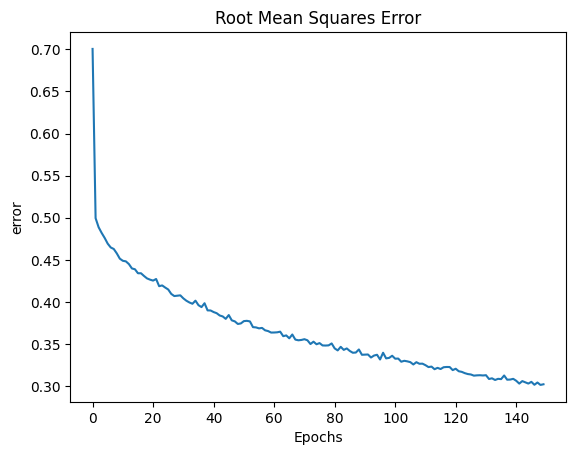

In [72]:

plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [73]:
spfnet.evaluate(X_train, y_train)

99/99 [==============================] - 0s 560us/step - loss: 0.0854 - root_mean_squared_error: 0.2923


[0.08543567359447479, 0.29229381680488586]

In [74]:
from sklearn.metrics import mean_squared_error

y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

454.5880987793754

In [75]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

273.2897878135782

In [76]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7355328640699141

In [77]:
r2_score(train_pred_orig, y_train_orig)

0.8997981312688456

In [78]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[1163.67919922, 1485.1517    ],
       [ 339.90261841,  238.13972   ],
       [1625.8026123 , 1662.2218    ],
       ...,
       [2384.73608398, 2766.8408    ],
       [ 624.10559082,  591.26963   ],
       [1406.73950195, 1004.3757    ]])

In [79]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2286.45825195, 2511.2375    ],
       [ 601.56933594,  480.20512   ],
       [1421.53942871, 2017.5687    ],
       ...,
       [ 599.46099854,  523.50056   ],
       [2295.68920898, 2506.2019    ],
       [ 875.46472168,  484.93113   ]])

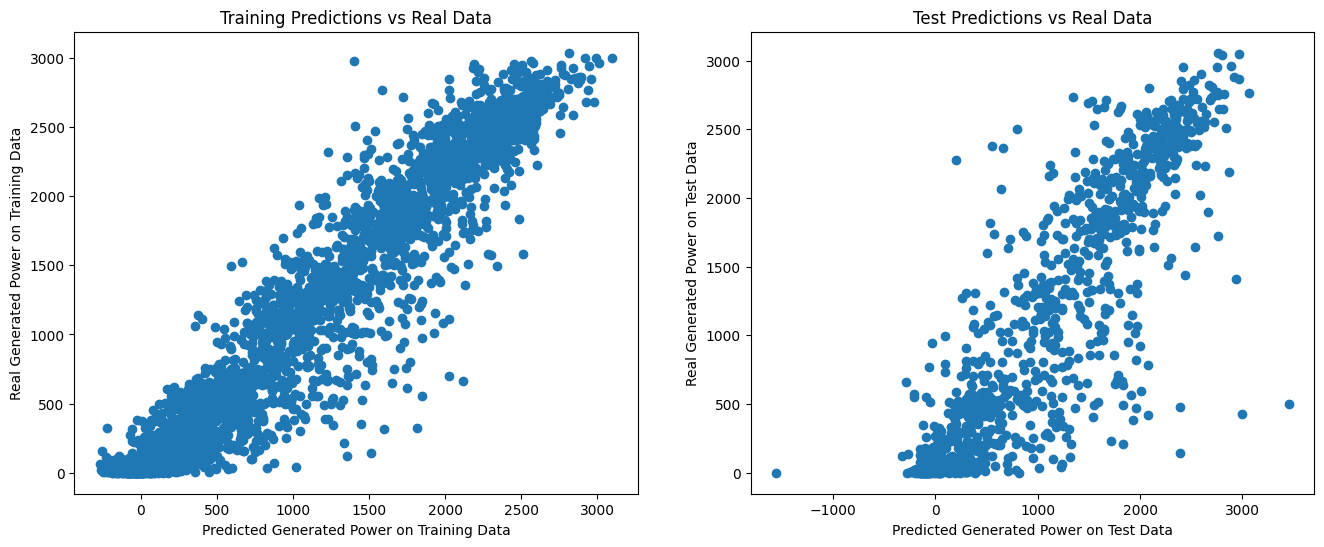

In [80]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

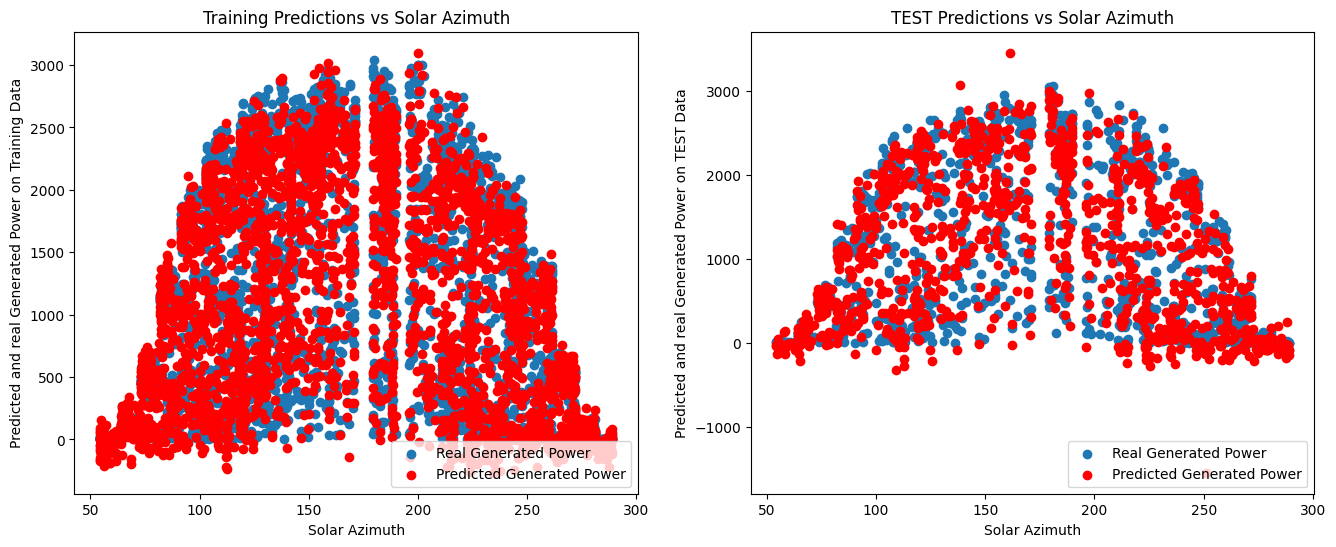

In [81]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on Training Data')
plt.xlabel('Solar Azimuth')
plt.title('Training Predictions vs Solar Azimuth')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

# LSTM

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from datetime import timedelta
from statsmodels.tsa.arima_model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.metrics import mean_absolute_error
import json

In [83]:
dts = pd.read_csv('spg.csv')
# dts.head(10)
dts1 = dts
dts1['index'] = range(1, len(dts1) + 1)
dts1.info()
dts.info()
result = dts1.to_json(orient="columns")
parsed = json.loads(result)
json.dumps(parsed, indent=10)

X = dts.iloc[:, :].values
y = dts.iloc[:, -3].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 22 columns):
temperature_2_m_above_gnd            4213 non-null float64
relative_humidity_2_m_above_gnd      4213 non-null int64
mean_sea_level_pressure_MSL          4213 non-null float64
total_precipitation_sfc              4213 non-null float64
snowfall_amount_sfc                  4213 non-null float64
total_cloud_cover_sfc                4213 non-null float64
high_cloud_cover_high_cld_lay        4213 non-null int64
medium_cloud_cover_mid_cld_lay       4213 non-null int64
low_cloud_cover_low_cld_lay          4213 non-null int64
shortwave_radiation_backwards_sfc    4213 non-null float64
wind_speed_10_m_above_gnd            4213 non-null float64
wind_direction_10_m_above_gnd        4213 non-null float64
wind_speed_80_m_above_gnd            4213 non-null float64
wind_direction_80_m_above_gnd        4213 non-null float64
wind_speed_900_mb                    4213 non-null float64
wind_direction_9

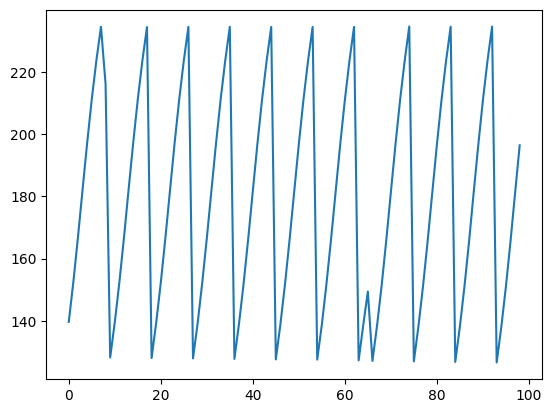

In [84]:
plt.plot(y[1:100])
plt.show()
#exit()

In [85]:
print(X.shape, y.shape)
y = np.reshape(y, (1,-1))
y.shape

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
Maxmin = MinMaxScaler(feature_range=(0, 1))
y_strud_lstm = scaler.fit_transform(X)
print(X[:,-1].reshape(-1,1).shape)
y_p =  Maxmin.fit_transform(X[:,-1].reshape(-1,1))

(4213, 22) (4213,)
(4213, 1)


In [86]:
train_size = int(len(y_strud_lstm) * 0.7)
print('------------------',len(y_strud_lstm))
print('ktla gi',train_size)

test_size = len(y_strud_lstm) - train_size
train, test = y_strud_lstm[0:train_size,:], y_strud_lstm[train_size:len(y_strud_lstm),:]
print('kich thuoc data' ,train.shape, test.shape)

------------------ 4213
ktla gi 2949
kich thuoc data (2949, 22) (1264, 22)


In [87]:
import math 
nodes = 40
epochs = 300
verbose = 2 # 0=print no output, 1=most, 2=less, 3=least
look_back = 1
lstm_params = [nodes, epochs, verbose]
def create_dataset(dataset, look_back=look_back):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

In [88]:
# def lstm_model(X_train_h, X_test_h, look_back, lstm_params):
np.random.seed(1)
batch_size = 30

In [89]:
# creating the training and testing datasets
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)

2949 1
1264 1
(2947, 1, 22)


In [90]:
# print(X_train.shape, y_train.shape)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = np.reshape(y_train,(y_train.shape[0],1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = np.reshape(y_test,(y_test.shape[0],1))
# X_train = X_train[...,  np.newaxis]
# X_test = X_test[...,  np.newaxis]

In [91]:
# training the model
model = tf.keras.models.Sequential([
    LSTM(lstm_params[0], input_shape=(look_back,22),return_sequences=True),
    LSTM(units = 40, return_sequences = True),
    Dense(units = 1)
    ])

In [92]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 40)             10080     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 40)             12960     
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1)              41        
Total params: 23,081
Trainable params: 23,081
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
# model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X_train, y_train, epochs=lstm_params[1], batch_size = batch_size, verbose=lstm_params[2])

Epoch 1/300
99/99 - 0s - loss: 0.0490 - root_mean_squared_error: 0.2215
Epoch 2/300
99/99 - 0s - loss: 0.0071 - root_mean_squared_error: 0.0840
Epoch 3/300
99/99 - 0s - loss: 0.0023 - root_mean_squared_error: 0.0475
Epoch 4/300
99/99 - 0s - loss: 0.0013 - root_mean_squared_error: 0.0356
Epoch 5/300
99/99 - 0s - loss: 7.1433e-04 - root_mean_squared_error: 0.0267
Epoch 6/300
99/99 - 0s - loss: 3.6973e-04 - root_mean_squared_error: 0.0192
Epoch 7/300
99/99 - 0s - loss: 2.0988e-04 - root_mean_squared_error: 0.0145
Epoch 8/300
99/99 - 0s - loss: 1.2631e-04 - root_mean_squared_error: 0.0112
Epoch 9/300
99/99 - 0s - loss: 8.8649e-05 - root_mean_squared_error: 0.0094
Epoch 10/300
99/99 - 0s - loss: 6.8276e-05 - root_mean_squared_error: 0.0083
Epoch 11/300
99/99 - 0s - loss: 5.9812e-05 - root_mean_squared_error: 0.0077
Epoch 12/300
99/99 - 0s - loss: 4.4259e-05 - root_mean_squared_error: 0.0067
Epoch 13/300
99/99 - 0s - loss: 4.0700e-05 - root_mean_squared_error: 0.0064
Epoch 14/300
99/99 - 0s 

Epoch 108/300
99/99 - 0s - loss: 6.4917e-06 - root_mean_squared_error: 0.0025
Epoch 109/300
99/99 - 0s - loss: 3.3632e-06 - root_mean_squared_error: 0.0018
Epoch 110/300
99/99 - 0s - loss: 3.3132e-06 - root_mean_squared_error: 0.0018
Epoch 111/300
99/99 - 0s - loss: 2.0929e-06 - root_mean_squared_error: 0.0014
Epoch 112/300
99/99 - 0s - loss: 4.0747e-06 - root_mean_squared_error: 0.0020
Epoch 113/300
99/99 - 0s - loss: 4.7898e-06 - root_mean_squared_error: 0.0022
Epoch 114/300
99/99 - 0s - loss: 3.0216e-06 - root_mean_squared_error: 0.0017
Epoch 115/300
99/99 - 0s - loss: 3.9918e-06 - root_mean_squared_error: 0.0020
Epoch 116/300
99/99 - 0s - loss: 6.5141e-06 - root_mean_squared_error: 0.0026
Epoch 117/300
99/99 - 0s - loss: 2.8047e-06 - root_mean_squared_error: 0.0017
Epoch 118/300
99/99 - 0s - loss: 3.7188e-06 - root_mean_squared_error: 0.0019
Epoch 119/300
99/99 - 0s - loss: 2.7461e-06 - root_mean_squared_error: 0.0017
Epoch 120/300
99/99 - 0s - loss: 3.0959e-06 - root_mean_squared_

Epoch 213/300
99/99 - 0s - loss: 4.4432e-06 - root_mean_squared_error: 0.0021
Epoch 214/300
99/99 - 0s - loss: 1.4159e-06 - root_mean_squared_error: 0.0012
Epoch 215/300
99/99 - 0s - loss: 1.5906e-06 - root_mean_squared_error: 0.0013
Epoch 216/300
99/99 - 0s - loss: 3.4096e-06 - root_mean_squared_error: 0.0018
Epoch 217/300
99/99 - 0s - loss: 4.8054e-06 - root_mean_squared_error: 0.0022
Epoch 218/300
99/99 - 0s - loss: 1.0316e-06 - root_mean_squared_error: 0.0010
Epoch 219/300
99/99 - 0s - loss: 8.2356e-07 - root_mean_squared_error: 9.0750e-04
Epoch 220/300
99/99 - 0s - loss: 1.5300e-06 - root_mean_squared_error: 0.0012
Epoch 221/300
99/99 - 0s - loss: 2.1890e-06 - root_mean_squared_error: 0.0015
Epoch 222/300
99/99 - 0s - loss: 1.6589e-06 - root_mean_squared_error: 0.0013
Epoch 223/300
99/99 - 0s - loss: 4.4793e-06 - root_mean_squared_error: 0.0021
Epoch 224/300
99/99 - 0s - loss: 5.6621e-06 - root_mean_squared_error: 0.0024
Epoch 225/300
99/99 - 0s - loss: 9.1346e-07 - root_mean_squa

In [94]:
# inverse transforming results
trainPredict = model.predict(X_train, batch_size=batch_size)

print("trainPredict",trainPredict.shape,trainPredict[0])

print(y_train[0])

testPredict = model.predict(X_test, batch_size=batch_size)

model.reset_states()

trainPredict (2947, 1, 1) [[0.00019079]]
[0.00023742]


In [95]:
# reshape the data for invert predicts 
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],trainPredict.shape[1]))
# y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
testPredict = np.reshape(testPredict,(testPredict.shape[0],testPredict.shape[1]))
# y_test = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))

print(trainPredict.shape, y_train.shape)

(2947, 1) (2947, 1)


In [96]:
# invert predictions
y_train = Maxmin.inverse_transform(y_train)
trainPredict = Maxmin.inverse_transform(trainPredict)
testPredict = Maxmin.inverse_transform(testPredict)
y_test = Maxmin.inverse_transform(y_test)
# calculate root mean squared error
trainScore = mean_squared_error(y_test, testPredict)
print('Train Score: %.2f RMSE' % (trainScore))
testScore = mean_absolute_error(y_test, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# mse = mean_absolute_error(y_pred_orig, y_test_orig)

model.save("my_h5_model_lstm_h1.h5")

Train Score: 1994.31 RMSE
Test Score: 34.96 MAE
